In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

from rich.progress import track
from collections import defaultdict

In [2]:
df = pd.read_csv("/media/darthvader/New Volume/DataHub/infosys/chest_xray/Data_Entry_2017.csv")
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143,NaN


In [14]:
df.drop(["OriginalImage[Width", "Height]", "OriginalImagePixelSpacing[x", "y]", "Unnamed: 11"], axis=1, inplace=True)
df.columns = ["img_index", "label", "n_follow_ups", "pid", "p_age", "sex", "view_pos"]
df.head()

,img_index,label,n_follow_ups,pid,p_age,sex,view_pos
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,058Y,M,PA
2,00000001_002.png,Cardiomegaly|Effusion,2,1,058Y,M,PA
3,00000002_000.png,No Finding,0,2,081Y,M,PA
4,00000003_000.png,Hernia,0,3,081Y,F,PA


In [5]:
def get_img_index(file_path: str) -> list:
    data = ""
    with open(file_path, "r") as fp:
        data = fp.readlines()

    data = list(map(lambda x: x.replace("\n", ""), data))

    return data

In [10]:
train_val_list = get_img_index("/media/darthvader/New Volume/DataHub/infosys/chest_xray/train_val_list_NIH.txt")
test_list = get_img_index("/media/darthvader/New Volume/DataHub/infosys/chest_xray/test_list_NIH.txt")

print(f"Length of train_val list: {len(train_val_list)}")
print(f"Length of test list: {len(test_list)}")

Length of train_val list: 86524
Length of test list: 25596


In [15]:
train_val_data = defaultdict(lambda: list())
test_data = defaultdict(lambda: list())

for root, folder, files in os.walk("/media/darthvader/New Volume/DataHub/infosys/chest_xray/images-224"):
    n_files = len(files)
    for idx in track(range(n_files)):
        img_file = files[idx]

        if img_file in train_val_list:
            train_val_data["img_path"].append(os.path.join(root, img_file))
            train_val_data["img_index"].append(img_file)
        
        elif img_file in test_list:
            test_data["img_path"].append(os.path.join(root, img_file))
            test_data["img_index"].append(img_file)

Output()

Output()

In [25]:
train_val_df = pd.DataFrame(train_val_data)
test_df = pd.DataFrame(test_data)

print(f"Shape of train_val_df: {train_val_df.shape}")
print(f"Shape of test_df: {test_df.shape}")

Shape of train_val_df: (86524, 2)
Shape of test_df: (25596, 2)


In [26]:
df["label"] = df["label"].str.replace("|", ",")
df = df.loc[~df["label"].str.contains(",")]
print(f"Number of records after removing multi-label: {df.shape}")

Number of records after removing multi-label: (91385, 7)


/tmp/ipykernel_45035/802076085.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["label"] = df["label"].str.replace("|", ",")


In [27]:
train_val_df = pd.merge(df, train_val_df, on="img_index", how="inner")
train_val_df.head()

,img_index,label,n_follow_ups,pid,p_age,sex,view_pos,img_path
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA,/media/darthvader/New Volume/DataHub/infosys/c...
1,00000002_000.png,No Finding,0,2,081Y,M,PA,/media/darthvader/New Volume/DataHub/infosys/c...
2,00000005_000.png,No Finding,0,5,069Y,F,PA,/media/darthvader/New Volume/DataHub/infosys/c...
3,00000005_001.png,No Finding,1,5,069Y,F,AP,/media/darthvader/New Volume/DataHub/infosys/c...
4,00000005_002.png,No Finding,2,5,069Y,F,AP,/media/darthvader/New Volume/DataHub/infosys/c...


In [29]:
test_df = pd.merge(df, test_df, on="img_index", how="inner")
test_df.head()

,img_index,label,n_follow_ups,pid,p_age,sex,view_pos,img_path
0,00000003_000.png,Hernia,0,3,081Y,F,PA,/media/darthvader/New Volume/DataHub/infosys/c...
1,00000003_001.png,Hernia,1,3,074Y,F,PA,/media/darthvader/New Volume/DataHub/infosys/c...
2,00000003_002.png,Hernia,2,3,075Y,F,PA,/media/darthvader/New Volume/DataHub/infosys/c...
3,00000003_004.png,Hernia,4,3,077Y,F,PA,/media/darthvader/New Volume/DataHub/infosys/c...
4,00000003_005.png,Hernia,5,3,078Y,F,PA,/media/darthvader/New Volume/DataHub/infosys/c...


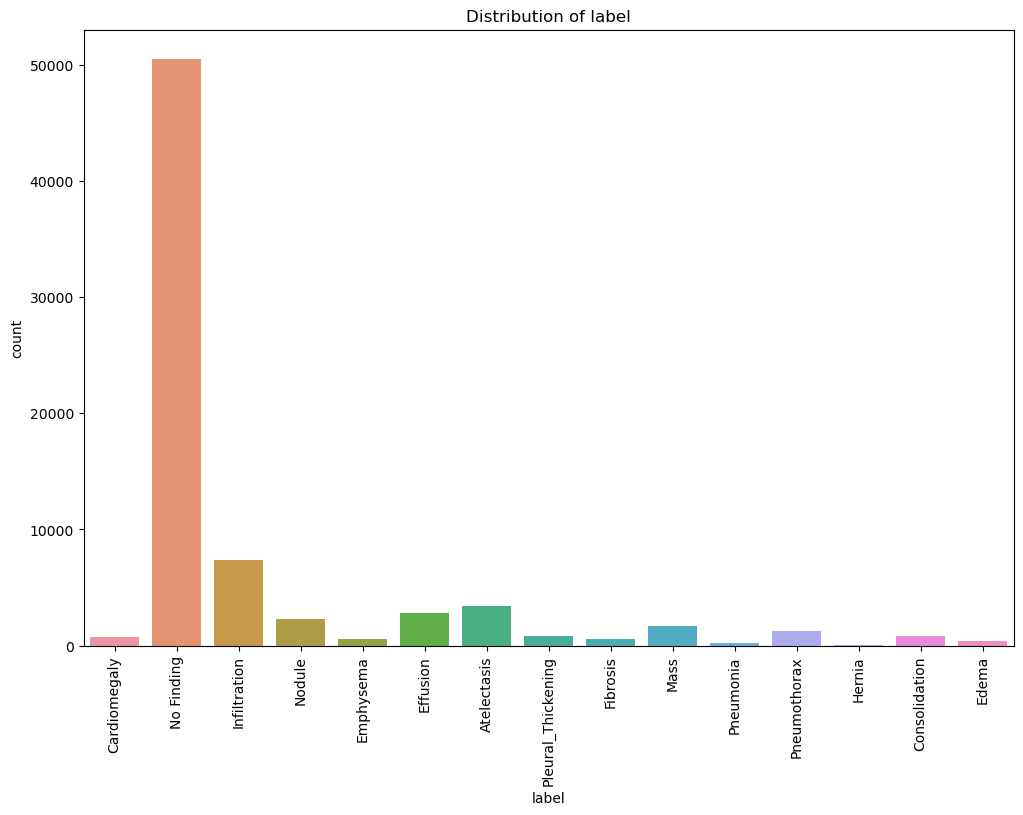

In [34]:
plt.figure(figsize=(12, 8))
plt.title("Distribution of label")
sns.countplot(x="label", data=train_val_df)
plt.xticks(rotation=90)
plt.show()

In [35]:
train_val_df.to_csv("/media/darthvader/New Volume/DataHub/infosys/chest_xray/train_val_df.csv", index=False)
test_df.to_csv("/media/darthvader/New Volume/DataHub/infosys/chest_xray/test_df.csv", index=False)